In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'retail_store.csv' with the path to your dataset
data = pd.read_csv("C:\\Internships\\Oasis Infotech\\retail_sales_dataset.csv")

In [12]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


First few rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int

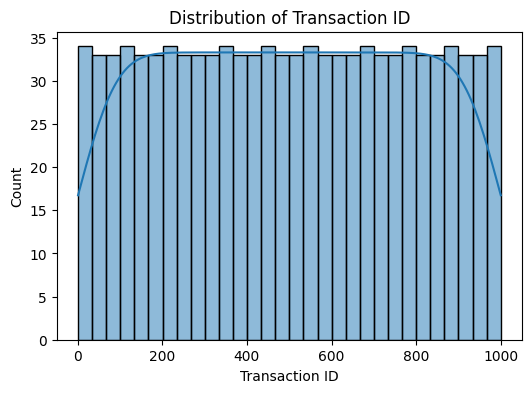

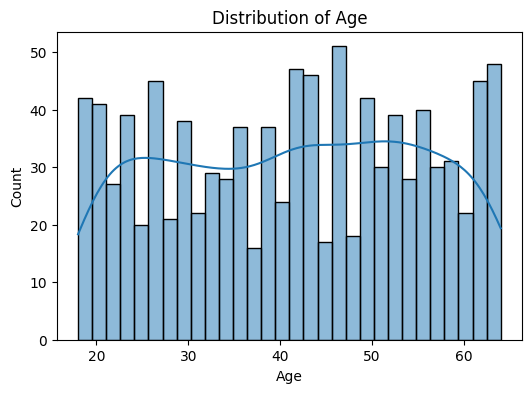

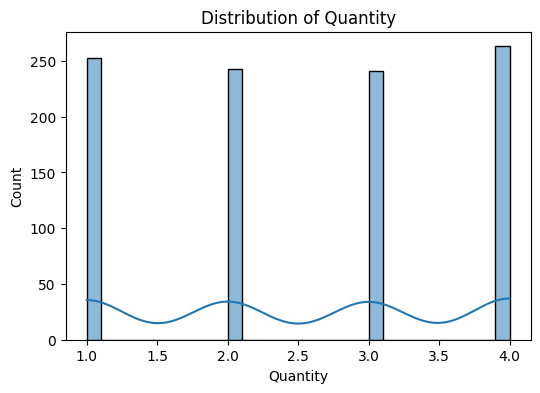

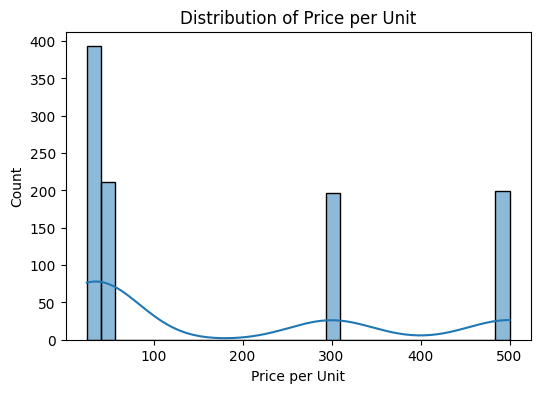

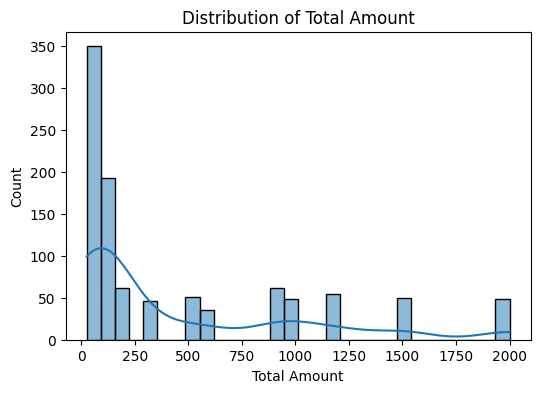

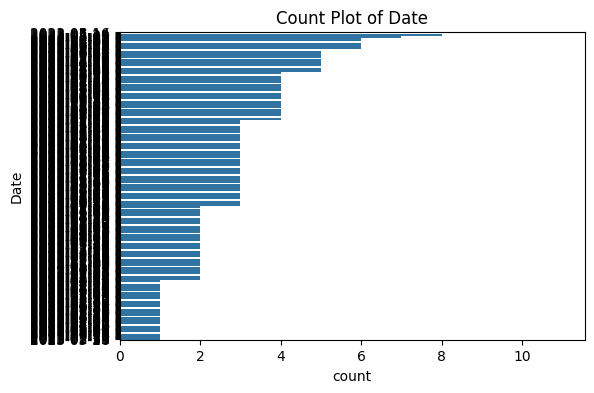

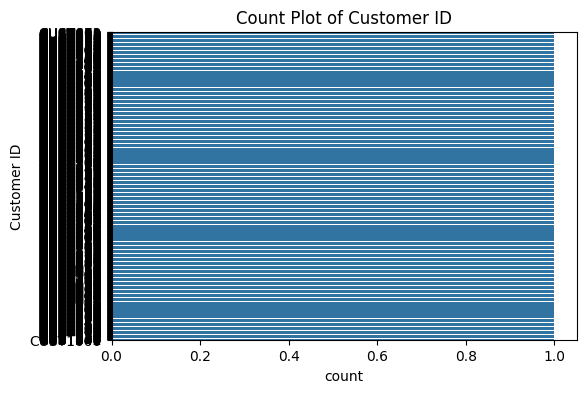

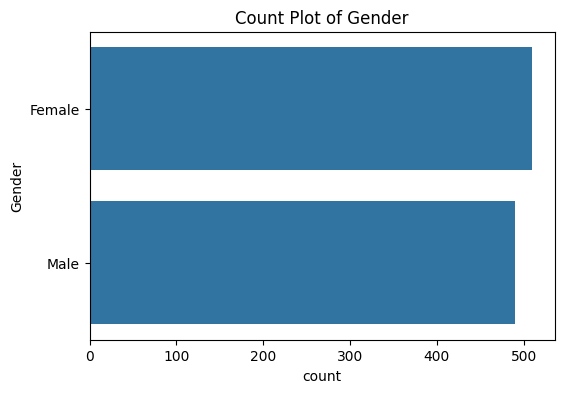

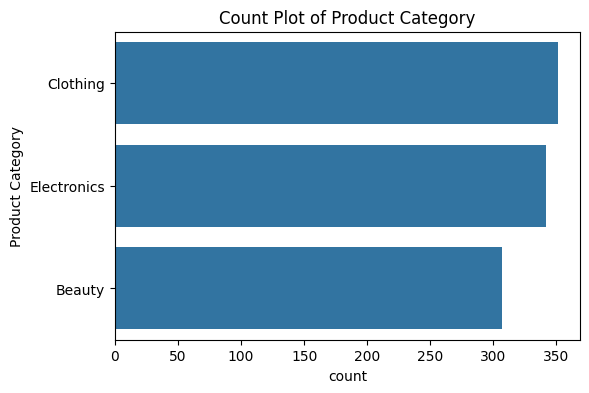

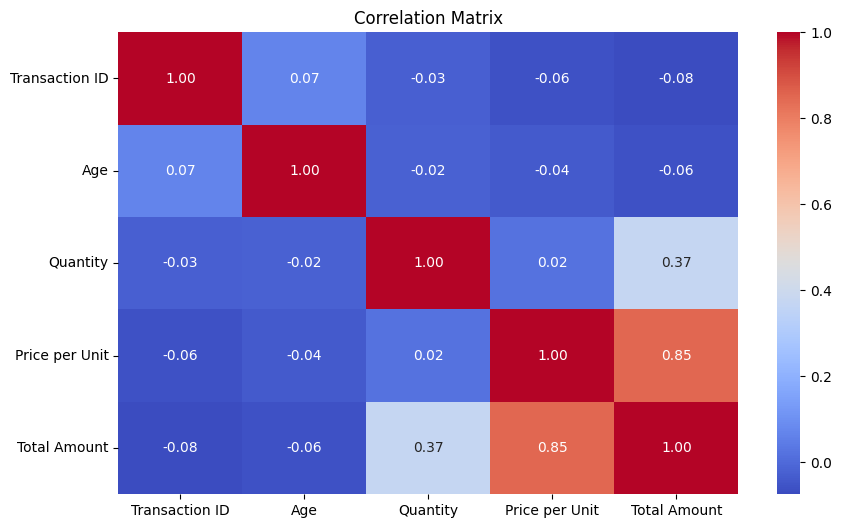


Cleaned dataset saved as 'retail_store_cleaned.csv'


In [13]:
# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Get basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Distribution of numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Sales Analysis (example)
if 'Sales' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, y='Sales')
    plt.title('Sales Distribution')
    plt.show()

# Check relationships (e.g., between Sales and other features)
if 'Sales' in data.columns:
    for col in numerical_cols:
        if col != 'Sales':
            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=data, x=col, y='Sales')
            plt.title(f'Sales vs {col}')
            plt.show()

# Handling missing values (example)
# Replace missing numerical values with the median
for i in data.columns :
    if data[i].dtype in ['int64', 'float64'] :
        data[i].fillna(data[i].median(), inplace=True)

# Replace missing categorical values with the mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Save the cleaned dataset
data.to_csv('retail_store_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'retail_store_cleaned.csv'")